# Group: Universe 🌟
1.   Trần Phương Thảo - 2132300447
2.   Võ Thị Hoài Anh - 2132300280

**PROJECT OBJECTIVES**
1.   Understand the impact of comment sentiment
2.   Identify audience preferences and trends
3.   Discover the factors of virality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [ ]:
!pip install langdetect
from langdetect import detect, LangDetectException

In [ ]:
from google.colab import files
data = files.upload()

Saving comments.csv to comments (1).csv
Saving videos-stats.csv to videos-stats (1).csv


In [ ]:
comment = pd.read_csv("comments.csv")
video_stat = pd.read_csv("videos-stats.csv")

# **DATA UNDERSTANDING**

In [ ]:
comment.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0.0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1.0,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2.0,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3.0,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4.0,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [ ]:
video_stat.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0.0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,08/23/2022,tech,3407.0,672.0,135612.0
1,1.0,The most EXPENSIVE thing I own.,b3x28s61q3c,08/24/2022,tech,76779.0,4306.0,1758063.0
2,2.0,My New House Gaming Setup is SICK!,4mgePWWCAmA,08/23/2022,tech,63825.0,3338.0,1564007.0
3,3.0,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,08/23/2022,tech,71566.0,1426.0,922918.0
4,4.0,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0


In [ ]:
comment.shape

(18409, 5)

In [ ]:
comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18406 non-null  float64
 1   Video ID    18402 non-null  object 
 2   Comment     18390 non-null  object 
 3   Likes       18391 non-null  float64
 4   Sentiment   18396 non-null  float64
dtypes: float64(3), object(2)
memory usage: 719.2+ KB


In [ ]:
comment['Likes'].describe('') # only describe 'Likes' column because it's meaningful

,Likes
count,18391.000000
mean,1040.374477
std,10656.298803
min,0.000000
50%,29.000000
max,891372.000000


In [ ]:
video_stat.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0.0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,08/23/2022,tech,3407.0,672.0,135612.0
1,1.0,The most EXPENSIVE thing I own.,b3x28s61q3c,08/24/2022,tech,76779.0,4306.0,1758063.0
2,2.0,My New House Gaming Setup is SICK!,4mgePWWCAmA,08/23/2022,tech,63825.0,3338.0,1564007.0
3,3.0,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,08/23/2022,tech,71566.0,1426.0,922918.0
4,4.0,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0


# **DATA CLEANING AND PREPROCESSING**

In [ ]:
comment.drop(columns=['Unnamed: 0'], inplace=True)
video_stat.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
comment.duplicated().sum()

np.int64(161)

In [ ]:
comment.drop_duplicates(inplace=True)

In [ ]:
comment.isna().sum()

,0
Video ID,3
Comment,6
Likes,5
Sentiment,3


In [ ]:
comment.dropna(subset=['Video ID', 'Comment', 'Sentiment'], inplace=True) #keep a row if 'Video ID', 'Comment' and 'Sentiment' all have values, if any of them are missing, the row is dropped

In [ ]:
comment['Likes'].fillna(0, inplace=True) #if 'Likes' is missing, fill it with 0

/tmp/ipython-input-3496186186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  comment['Likes'].fillna(0, inplace=True) #if 'Likes' is missing, fill it with 0


In [ ]:
comment.shape

(18242, 4)

In [ ]:
comment_convert = ['Likes', 'Sentiment']
for col in comment_convert:
    comment[col] = comment[col].astype(int)

In [ ]:
comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18242 entries, 0 to 18408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Video ID   18242 non-null  object
 1   Comment    18242 non-null  object
 2   Likes      18242 non-null  int64 
 3   Sentiment  18242 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 712.6+ KB


***=> after cleaning, we have 18,242 rows and 4 columns for dataset 'Comments'***

In [ ]:
video_stat

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,08/23/2022,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,08/24/2022,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,08/23/2022,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,08/23/2022,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1876,Should You Learn Machine Learning?,AO6urf07KjE,06/14/2021,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,10/08/2017,machine learning,2981.0,72.0,431421.0
1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,02/20/2020,machine learning,5198.0,443.0,226152.0
1879,What is Machine Learning?,f_uwKZIAeM0,01/11/2017,machine learning,NaN,NaN,NaN


In [ ]:
video_stat.shape

(1881, 7)

In [ ]:
video_stat.describe()

,Likes,Comments,Views
count,1.836000e+03,1841.000000,1.847000e+03
mean,1.718344e+05,7927.416078,1.174573e+07
std,8.047348e+05,38245.578385,1.093706e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.670750e+03,198.000000,8.358000e+04
50%,1.476400e+04,807.000000,5.899070e+05
75%,6.086350e+04,3373.000000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


In [ ]:
video_stat.duplicated().sum()

np.int64(4)

In [ ]:
video_stat.drop_duplicates(inplace=True)

In [ ]:
video_stat.isna().sum()

,0
Title,14
Video ID,17
Published At,39
Keyword,40
Likes,41
Comments,36
Views,30


In [ ]:
video_stat.dropna(inplace=True)

In [ ]:
video_stat

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,08/23/2022,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,08/24/2022,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,08/23/2022,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,08/23/2022,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,02/01/2022,machine learning,1861.0,184.0,37959.0
1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,05/11/2021,machine learning,9615.0,648.0,319957.0
1876,Should You Learn Machine Learning?,AO6urf07KjE,06/14/2021,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,10/08/2017,machine learning,2981.0,72.0,431421.0


In [ ]:
video_stat['Published At'] = pd.to_datetime(video_stat['Published At'])

In [ ]:
video_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831 entries, 0 to 1878
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         1831 non-null   object        
 1   Video ID      1831 non-null   object        
 2   Published At  1831 non-null   datetime64[ns]
 3   Keyword       1831 non-null   object        
 4   Likes         1831 non-null   float64       
 5   Comments      1831 non-null   float64       
 6   Views         1831 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 179.0+ KB


In [ ]:
stat_convert = ['Likes','Comments','Views']
for col in stat_convert:
    video_stat[col] = video_stat[col].astype(int)

In [ ]:
df = pd.merge(video_stat, comment, on='Video ID', how='left') #videoID is the key column

In [ ]:
df

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
25808,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,As a GenX'er I enjoyed this interview so much....,21.0,2.0
25809,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
25810,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,This man got a great voiceover career availabl...,66.0,2.0
25811,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,This week has been awesome! First Scott Aarons...,26.0,2.0


In [ ]:
df.rename(columns={
    'Likes_x': 'Likes_video',
    'Comments': 'Comments_video',
    'Likes_y': 'Likes_comment'
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25813 entries, 0 to 25812
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           25813 non-null  object        
 1   Video ID        25813 non-null  object        
 2   Published At    25813 non-null  datetime64[ns]
 3   Keyword         25813 non-null  object        
 4   Likes_video     25813 non-null  int64         
 5   Comments_video  25813 non-null  int64         
 6   Views           25813 non-null  int64         
 7   Comment         25812 non-null  object        
 8   Likes_comment   25812 non-null  float64       
 9   Sentiment       25812 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [ ]:
df

,Title,Video ID,Published At,Keyword,Likes_video,Comments_video,Views,Comment,Likes_comment,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
25808,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,As a GenX'er I enjoyed this interview so much....,21.0,2.0
25809,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
25810,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,This man got a great voiceover career availabl...,66.0,2.0
25811,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,This week has been awesome! First Scott Aarons...,26.0,2.0


In [ ]:
df['Likes_comment'].fillna(0, inplace=True)
df['Sentiment'].fillna(0, inplace=True)

/tmp/ipython-input-4159663389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Likes_comment'].fillna(0, inplace=True)
/tmp/ipython-input-4159663389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
convert_again = ['Likes_comment', 'Sentiment']
for col in convert_again:
    df[col] = df[col].astype(int)

In [ ]:
df

,Title,Video ID,Published At,Keyword,Likes_video,Comments_video,Views,Comment,Likes_comment,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Let's not forget that Apple Pay in 2014 requir...,95,1
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Here in NZ 50% of retailers don’t even have co...,19,0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,I will forever acknowledge this channel with t...,161,2
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Whenever I go to a place that doesn’t take App...,8,0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,"Apple Pay is so convenient, secure, and easy t...",34,2
...,...,...,...,...,...,...,...,...,...,...
25808,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,As a GenX'er I enjoyed this interview so much....,21,2
25809,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,I took Ng's class on Coursera years ago. It sw...,159,2
25810,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,This man got a great voiceover career availabl...,66,2
25811,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198,443,226152,This week has been awesome! First Scott Aarons...,26,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25813 entries, 0 to 25812
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           25813 non-null  object        
 1   Video ID        25813 non-null  object        
 2   Published At    25813 non-null  datetime64[ns]
 3   Keyword         25813 non-null  object        
 4   Likes_video     25813 non-null  int64         
 5   Comments_video  25813 non-null  int64         
 6   Views           25813 non-null  int64         
 7   Comment         25812 non-null  object        
 8   Likes_comment   25813 non-null  int64         
 9   Sentiment       25813 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Published At,Likes_video,Comments_video,Views,Likes_comment,Sentiment
count,25813,2.581300e+04,25813.000000,2.581300e+04,25813.000000,25813.000000
mean,2021-08-13 03:08:33.369232384,1.535424e+05,6915.636656,1.144293e+07,871.658854,1.505985
min,2007-07-16 00:00:00,-1.000000e+00,-1.000000,2.500000e+01,0.000000,0.000000
25%,2021-08-03 00:00:00,2.122000e+03,197.000000,9.418800e+04,4.000000,1.000000
50%,2022-06-16 00:00:00,1.480000e+04,805.000000,5.917210e+05,27.000000,2.000000
75%,2022-08-23 00:00:00,7.711000e+04,3501.000000,2.812807e+06,156.000000,2.000000
max,2022-08-24 00:00:00,1.644556e+07,732818.000000,4.034122e+09,891372.000000,2.000000
std,NaN,6.905278e+05,32773.353883,9.385818e+07,9062.719996,0.700510


In [ ]:
df[df['Likes_video'] < 0]

,Title,Video ID,Published At,Keyword,Likes_video,Comments_video,Views,Comment,Likes_comment,Sentiment
4410,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,2021-02-09,business,-1,1144,676300,"This should be behind gated content.\nI never,...",207,2
4411,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,2021-02-09,business,-1,1144,676300,"*To reach your potential, you need to start wo...",41,2
4412,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,2021-02-09,business,-1,1144,676300,"Great video, thanks for making it easier for m...",25,2
4413,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,2021-02-09,business,-1,1144,676300,Great lesson! True Words!,1,2
4414,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,2021-02-09,business,-1,1144,676300,<Your explanation is realistic and straight to...,61,2
...,...,...,...,...,...,...,...,...,...,...
23649,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1,105,1541874,Everyone is busy praising this movie.....but I...,1555,2
23650,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1,105,1541874,"Not willing to watch others Review, always wai...",11,1
23651,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1,105,1541874,"Hey KRK , you are someone who is an well educa...",2,1
23652,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1,105,1541874,3:13 hilarious review 😅🤣😂😅\nI am Pakistani and...,12,2


In [ ]:
df[df['Comments_video'] < 0]

,Title,Video ID,Published At,Keyword,Likes_video,Comments_video,Views,Comment,Likes_comment,Sentiment
23516,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,[ ] [v] ¡EXCELENTE\n Western Clásico y me en...,1,1
23517,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,It would have been a nice movie only it's real...,3,1
23518,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,Thanks for the movie,0,2
23519,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,Worthless movie and screwed up sound track ......,6,0
23520,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,👍🌹🌹🌹,0,2
23521,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,NOT EVEN THE SAME MOVIE AND ITS A BUNCH OF JOC...,0,0
23522,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,What a DUD movie! Voices are out of sync and t...,0,0
23523,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,Not loud enough!,1,0
23524,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105,-1,28219,Rubbish Waste of Time.,0,0
23594,BEST Auditions Of Songs From Movies | Amazing ...,ZcBBGC8_mfU,2022-07-25,movies,20138,-1,5351960,Did you ENJOY watching this? Do you want to se...,107,2


In [ ]:
df['Likes_video'] = df['Likes_video'].apply(lambda x: np.nan if x < 0 else x)
df['Comments_video'] = df['Comments_video'].apply(lambda x: np.nan if x < 0 else x)
df.dropna(subset=['Likes_video', 'Comments_video'], inplace=True)

In [ ]:
sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df['Sentiment_label'] = df['Sentiment'].map(sentiment_map)
df.head() #completed and clean dataset, ready to analyze

,Title,Video ID,Published At,Keyword,Likes_video,Comments_video,Views,Comment,Likes_comment,Sentiment,Sentiment_label
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612,Let's not forget that Apple Pay in 2014 requir...,95,1,Neutral
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612,Here in NZ 50% of retailers don’t even have co...,19,0,Negative
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612,I will forever acknowledge this channel with t...,161,2,Positive
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612,Whenever I go to a place that doesn’t take App...,8,0,Negative
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612,"Apple Pay is so convenient, secure, and easy t...",34,2,Positive


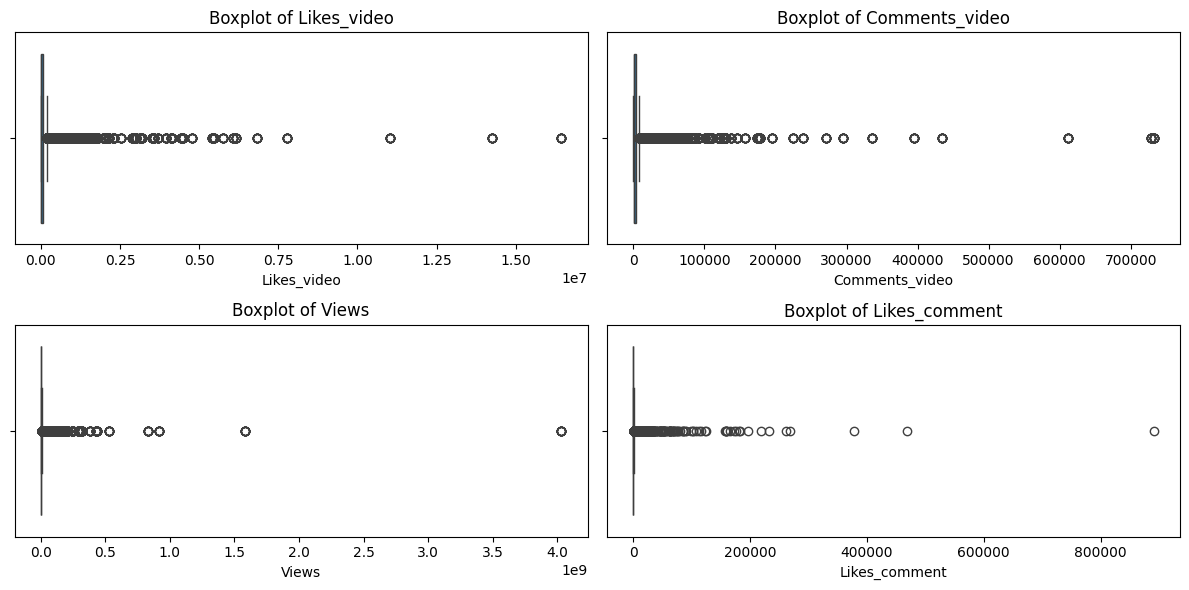

In [ ]:
numeric_cols = ['Likes_video', 'Comments_video', 'Views', 'Likes_comment']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

=> don't want to remove outliers, because it's meaningful in the business context we are working on.

# **ANALYZE DATA**

**DATA OVERVIEW**

In [ ]:
df.shape

(25451, 11)

In [ ]:
total_unique_videos = df['Video ID'].nunique()
total_comments = len(df)
sentiment_counts = df['Sentiment'].value_counts()
sentiment_distribution = sentiment_counts / total_comments * 100

print("Dataset overview")
print(f"Total unique videos: {total_unique_videos}")
print(f"Total comments: {total_comments}")
print("\nSentiment distribution (%):")
print(sentiment_distribution)

Dataset overview
Total unique videos: 1784
Total comments: 25451

Sentiment distribution (%):
Sentiment
2    62.630152
1    25.323170
0    12.046678
Name: count, dtype: float64


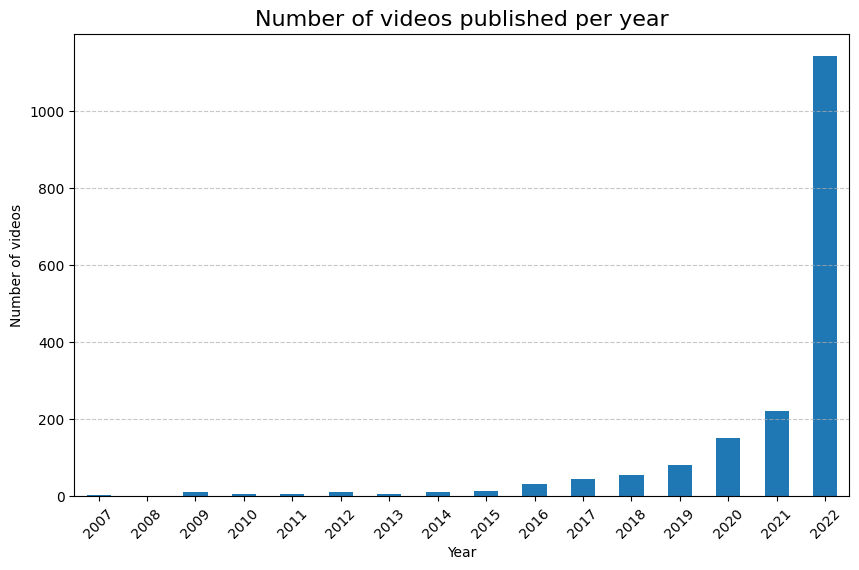

In [ ]:
df['Year'] = df['Published At'].dt.year
videos_per_year = df.drop_duplicates(subset='Video ID').groupby('Year')['Video ID'].nunique()

plt.figure(figsize=(10, 6))
videos_per_year.plot(kind='bar')
plt.title('Number of videos published per year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of videos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Understand the impact of comment sentiment on audience engagement**

In [ ]:
df['Sentiment_label'].value_counts()

,count
Sentiment_label,
Positive,15940
Neutral,6445
Negative,3066


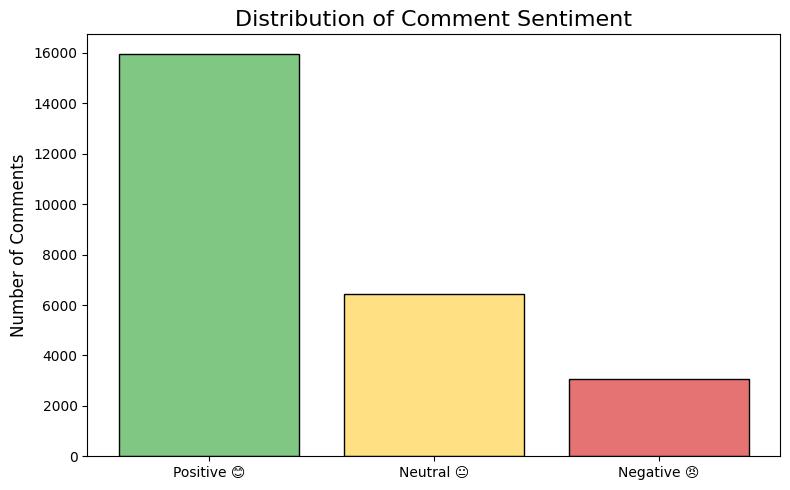

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()

# Define labels and mapping
labels = ['Positive 😊', 'Neutral 😐', 'Negative 😠']
sizes = [
    sentiment_counts.get(2, 0),  # Positive
    sentiment_counts.get(1, 0),  # Neutral
    sentiment_counts.get(0, 0)   # Negative
]

# Define colors
colors = ['#81c784', '#ffe082', '#e57373']  # green - positive, yellow - neutral, red - negative

# --- Bar chart ---
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.title("Distribution of Comment Sentiment", fontsize=16)
#plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

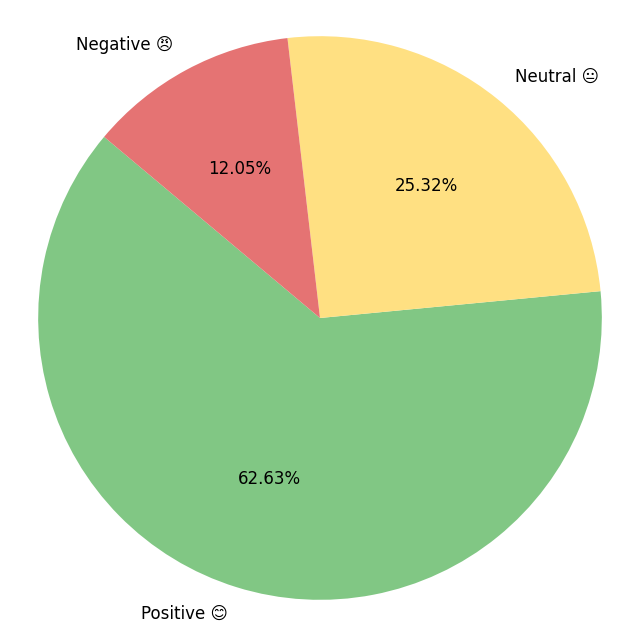

In [ ]:
# Create pie chart for % of sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.2f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
#plt.title('Sentiment Distribution', fontsize=16)
plt.axis('equal')
plt.show()

**Which type of comment - Positive, Negative, or Neutral - gets the most likes from other users?**

In [ ]:
likes_per_sentiment = df.groupby('Sentiment')['Likes_comment'].mean().reset_index()
likes_per_sentiment['Sentiment_label'] = likes_per_sentiment['Sentiment'].map(sentiment_map)

/tmp/ipython-input-2469446537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


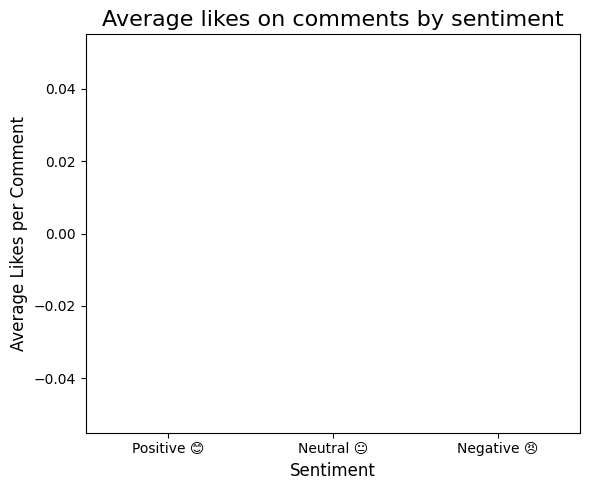

In [ ]:
sentiment_map = {2: 'Positive 😊', 1: 'Neutral 😐', 0: 'Negative 😠'}

# Order and colors
order = ['Positive 😊', 'Neutral 😐', 'Negative 😠']
colors = ['#81c784', '#ffe082', '#e57373']  # green, yellow, red

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    data=likes_per_sentiment,
    x='Sentiment_label',
    y='Likes_comment',
    order=order,
    palette=colors,
    edgecolor='black'
)

plt.title("Average likes on comments by sentiment", fontsize=16)
plt.ylabel("Average Likes per Comment", fontsize=12)
plt.xlabel("Sentiment", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
print("Average Likes on Comments by Sentiment:")
print(likes_per_sentiment)

Average Likes on Comments by Sentiment:
   Sentiment  Likes_comment Sentiment_label
0          0    1434.834964        Negative
1          1     893.699922         Neutral
2          2     764.394479        Positive


**Identify audience preferences and sentiment trends by topic**

Which topics receive the most negative/positive comments

In [ ]:
# Count the number of positive and negative comments for each keyword
sentiment_counts = df.groupby('Keyword')['Sentiment_label'].value_counts().unstack().fillna(0)

In [ ]:
top_10_most_positive = sentiment_counts.sort_values(by='Positive', ascending=False).head(10)
top_10_most_positive

Sentiment_label,Negative,Neutral,Positive
Keyword,,,
tech,162,296,822
asmr,74,237,735
computer science,86,244,641
chess,115,278,610
gaming,92,276,585
history,185,283,578
game development,65,164,544
data science,50,176,539
interview,76,163,533


In [ ]:
top_10_most_negative = sentiment_counts.sort_values(by='Negative', ascending=False).head(10)
top_10_most_negative

Sentiment_label,Negative,Neutral,Positive
Keyword,,,
cnn,268,140,69
history,185,283,578
news,171,269,420
tech,162,296,822
trolling,137,123,240
chess,115,278,610
google,108,187,412
sports,95,173,470
gaming,92,276,585


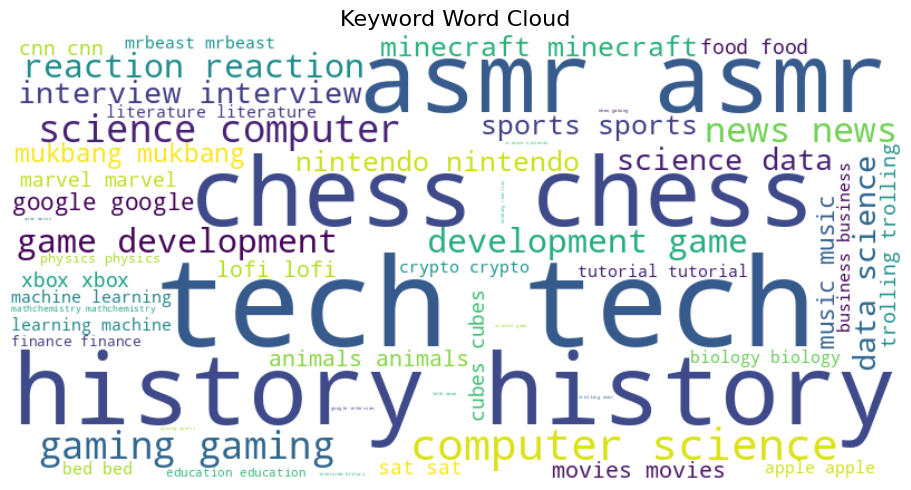

In [ ]:
#Word Cloud for Keywords
keyword_text = ' '.join(df['Keyword'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-243178619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_positive['Positive'], y=top_10_most_positive.index, palette='viridis', ax=ax[0])
/tmp/ipython-input-243178619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_negative['Negative'], y=top_10_most_negative.index, palette='plasma', ax=ax[1])


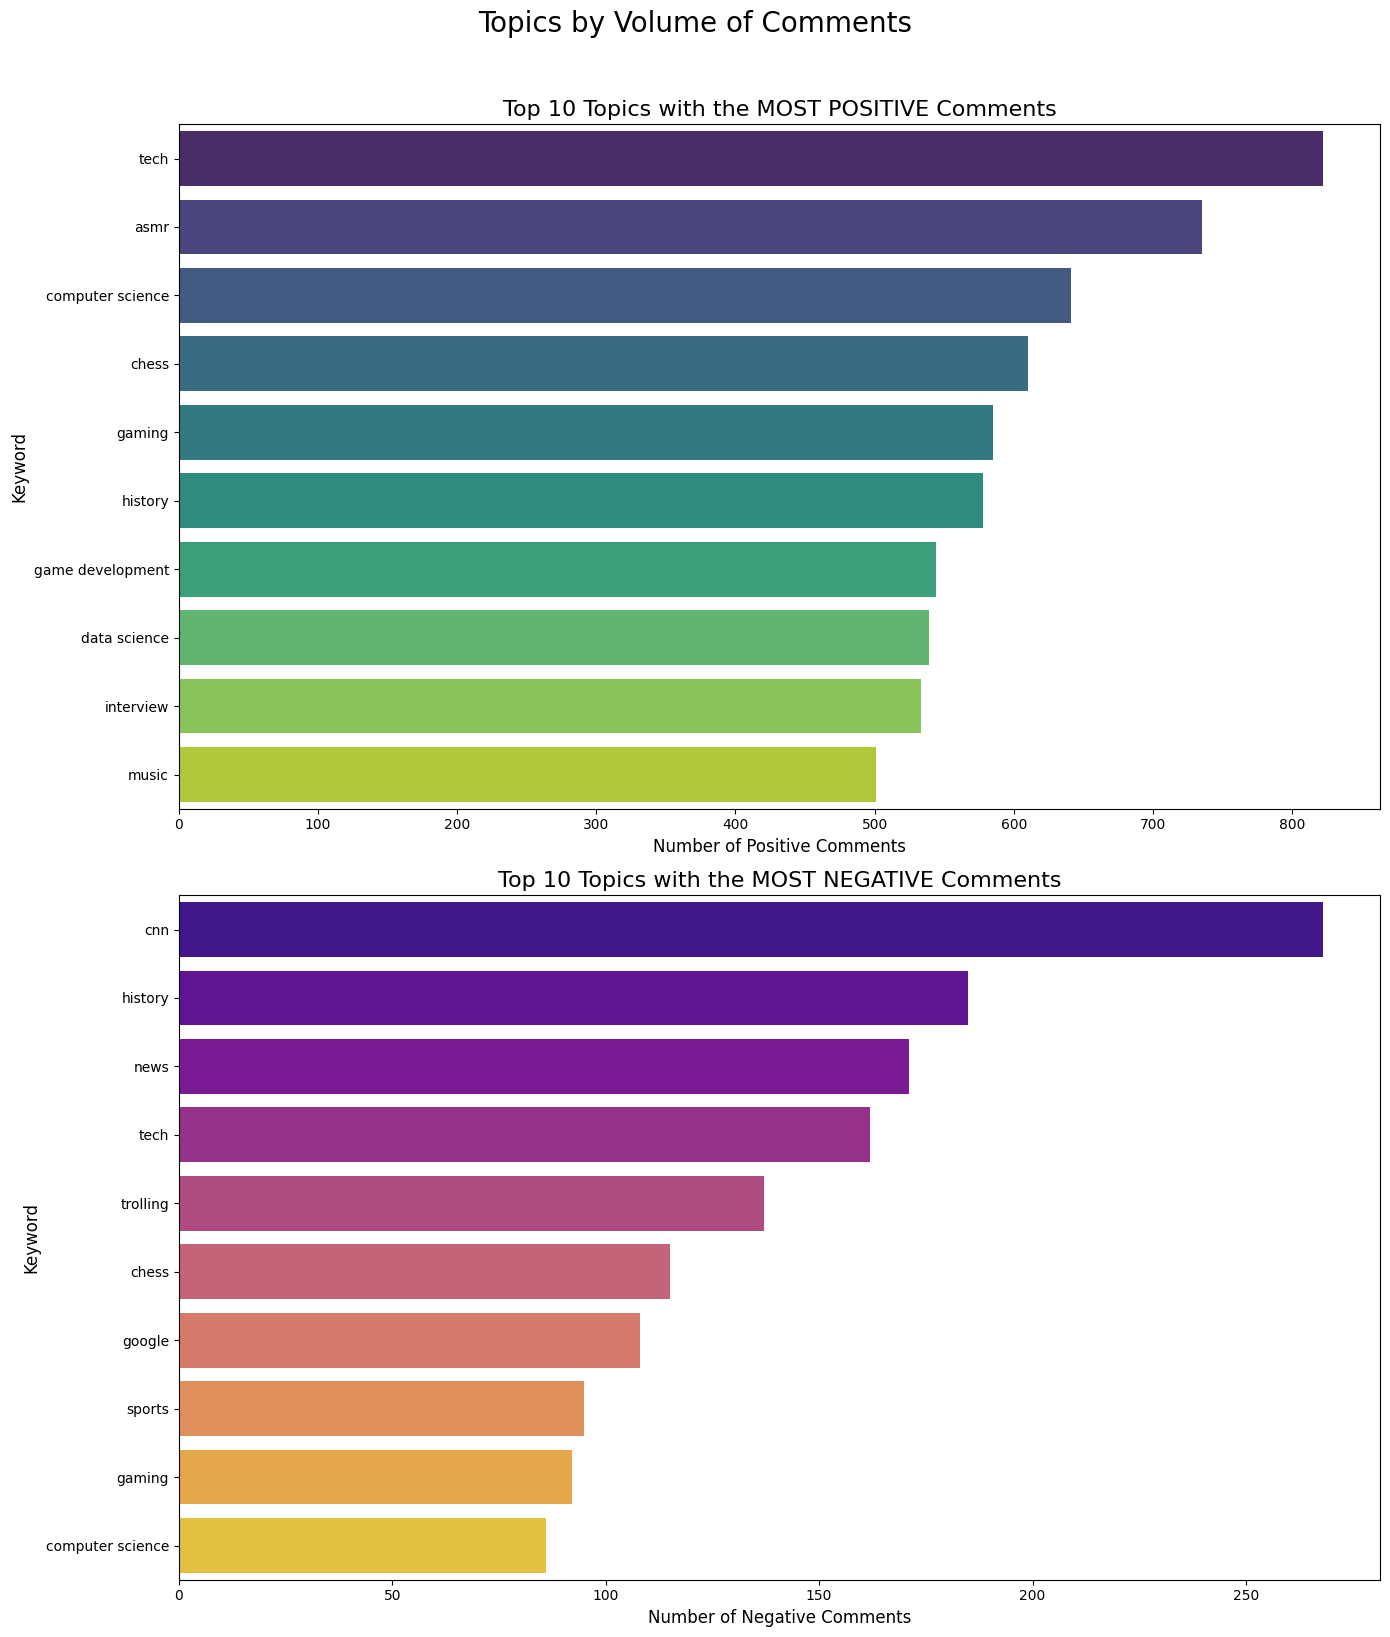

In [ ]:
top_10_most_positive = sentiment_counts.sort_values(by='Positive', ascending=False).head(10)
top_10_most_negative = sentiment_counts.sort_values(by='Negative', ascending=False).head(10)

fig, ax = plt.subplots(2, 1, figsize=(14, 16))
fig.suptitle('Topics by Volume of Comments', fontsize=20, y=1.02)

# Plot for topics with the most positive comments
sns.barplot(x=top_10_most_positive['Positive'], y=top_10_most_positive.index, palette='viridis', ax=ax[0])
ax[0].set_title('Top 10 Topics with the MOST POSITIVE Comments', fontsize=16)
ax[0].set_xlabel('Number of Positive Comments', fontsize=12)
ax[0].set_ylabel('Keyword', fontsize=12)

# Plot for topics with the most negative comments
sns.barplot(x=top_10_most_negative['Negative'], y=top_10_most_negative.index, palette='plasma', ax=ax[1])
ax[1].set_title('Top 10 Topics with the MOST NEGATIVE Comments', fontsize=16)
ax[1].set_xlabel('Number of Negative Comments', fontsize=12)
ax[1].set_ylabel('Keyword', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3171445023.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_most_positive['Positive'], y=top_3_most_positive.index, palette='viridis', ax=ax[0])
/tmp/ipython-input-3171445023.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_most_negative['Negative'], y=top_3_most_negative.index, palette='plasma', ax=ax[1])


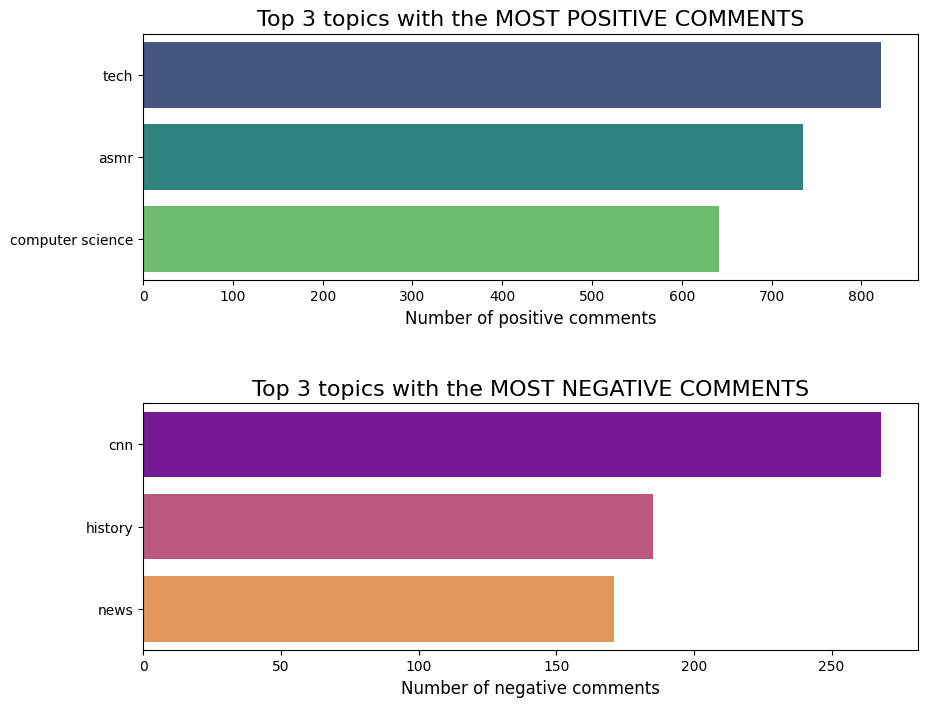

In [ ]:
top_3_most_positive = sentiment_counts.sort_values(by='Positive', ascending=False).head(3)
top_3_most_negative = sentiment_counts.sort_values(by='Negative', ascending=False).head(3)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot for topics with the most positive comments
sns.barplot(x=top_3_most_positive['Positive'], y=top_3_most_positive.index, palette='viridis', ax=ax[0])
ax[0].set_title('Top 3 topics with the MOST POSITIVE COMMENTS', fontsize=16)
ax[0].set_xlabel('Number of positive comments', fontsize=12)
ax[0].set_ylabel('')

# Plot for topics with the most negative comments
sns.barplot(x=top_3_most_negative['Negative'], y=top_3_most_negative.index, palette='plasma', ax=ax[1])
ax[1].set_title('Top 3 topics with the MOST NEGATIVE COMMENTS', fontsize=16)
ax[1].set_xlabel('Number of negative comments', fontsize=12)
ax[1].set_ylabel('')

plt.subplots_adjust(hspace=0.5)

plt.show()

**What are people talking about in the most positive and negative topics?**

Found 21957 English comments.

--- Analyzing 'tech' and 'cnn' topics ---


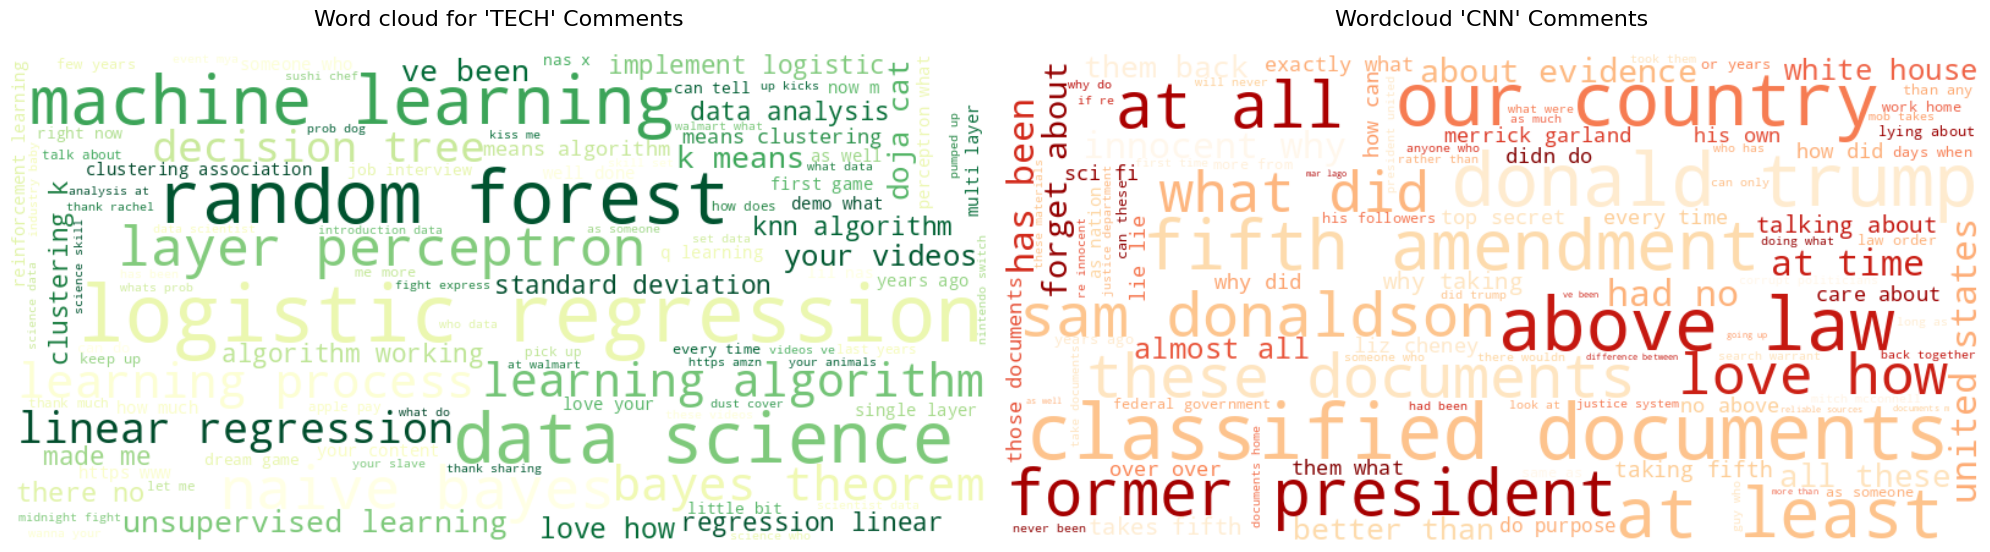

In [ ]:
def detect_language(text):
    try:
        if isinstance(text, str) and re.search('[a-zA-Z]', text):
            return detect(text)
        else:
            return 'unknown'
    except LangDetectException:
        return 'unknown'

if 'language' not in df.columns:
    df['language'] = df['Comment'].apply(detect_language)

df_english = df[df['language'] == 'en'].copy()
print(f"Found {len(df_english)} English comments.")


print("\n--- Analyzing 'tech' and 'cnn' topics ---")

positive_topic_name = 'tech'
negative_topic_name = 'cnn'

positive_comments_corpus = df_english[df_english['Keyword'] == positive_topic_name]['Comment']
negative_comments_corpus = df_english[df_english['Keyword'] == negative_topic_name]['Comment']


def get_top_bigrams_english_upgraded(text_series, n=100):
    full_text = ' '.join(text_series).lower()
    words = re.findall(r'\b\w+\b', full_text)
    words = [word for word in words if not word.isdigit()]
    stopwords = {
        'the', 'a', 'to', 'is', 'in', 'it', 'of', 'and', 'this', 'on', 'for',
        's', 't', 'i', 'you', 'he', 'she', 'they', 'we', 'my', 'so', 'was',
        'that', 'with', 'have', 'but', 'are', 'not', 'be', 'like', 'people',
        'don', 'get', 'one', 'make', 'even', 'see', 'also', 'really', 'think',
        'know', 'thing', 'say', 'go', 'would', 'could', 'just'
    }
    filtered_words = [word for word in words if word not in stopwords]
    bigrams = zip(filtered_words, filtered_words[1:])
    return Counter(bigrams).most_common(n)

top_positive_bigrams = get_top_bigrams_english_upgraded(positive_comments_corpus)
positive_freq = {f"{bg[0]} {bg[1]}": count for bg, count in top_positive_bigrams}

top_negative_bigrams = get_top_bigrams_english_upgraded(negative_comments_corpus)
negative_freq = {f"{bg[0]} {bg[1]}": count for bg, count in top_negative_bigrams}

wc_positive = WordCloud(width=800, height=400, background_color='white', colormap='YlGn')
wc_negative = WordCloud(width=800, height=400, background_color='white', colormap='OrRd')

if positive_freq:
    wc_positive.generate_from_frequencies(positive_freq)
if negative_freq:
    wc_negative.generate_from_frequencies(negative_freq)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].imshow(wc_positive, interpolation='bilinear')
ax[0].set_title(f"Word cloud for '{positive_topic_name.upper()}' Comments", fontsize=16, pad=20)
ax[0].axis('off')

ax[1].imshow(wc_negative, interpolation='bilinear')
ax[1].set_title(f"Wordcloud '{negative_topic_name.upper()}' Comments", fontsize=16, pad=20)
ax[1].axis('off')


plt.tight_layout()
plt.show()

**3. Determine factors that contribute to video virality**

**Identify keywords/topics that appear most often in viral videos**

In [ ]:
view_threshold = df['Views'].quantile(0.75)
viral_videos_df = df[df['Views'] > view_threshold]

In [ ]:
print(f"\nA video is considered 'viral' if it has more than {int(view_threshold):,} views.")


A video is considered 'viral' if it has more than 2,854,238 views.


In [ ]:
# Count the frequency of keywords in viral videos
# We drop duplicates by 'Video ID' to count each video only once
viral_keyword_counts = viral_videos_df.drop_duplicates(subset='Video ID')['Keyword'].value_counts()

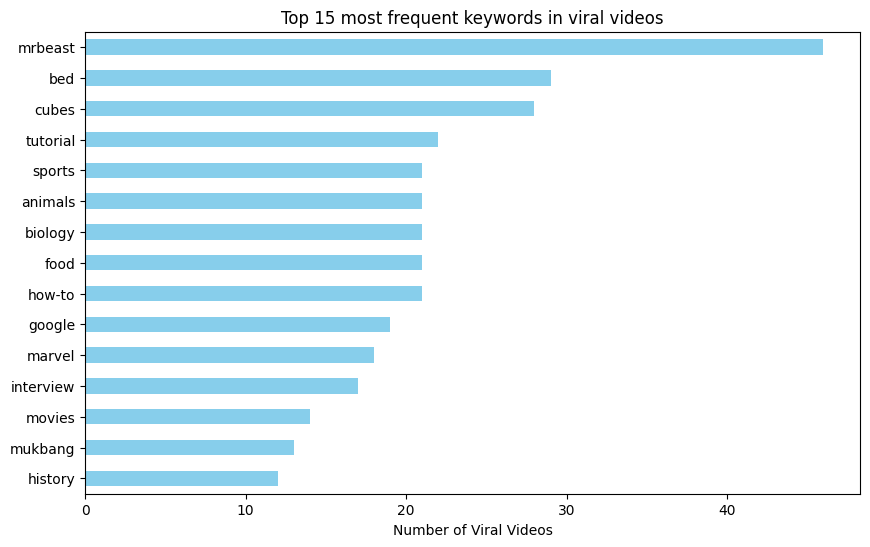

In [ ]:
plt.figure(figsize=(10, 6))
viral_keyword_counts.head(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 most frequent keywords in viral videos')
plt.xlabel('Number of Viral Videos')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Average Views per Keyword
keyword_perf = df.groupby('Keyword').agg(
    avg_views=('Views', 'mean'),
    avg_likes=('Likes_video', 'mean'),
    avg_comments=('Comment', 'count')
).reset_index().sort_values(by='avg_views', ascending=False)

print("Top Keywords by Average Views:")
print(keyword_perf.head())

Top Keywords by Average Views:
    Keyword     avg_views     avg_likes  avg_comments
17   google  1.131915e+08  4.350117e+05           707
28  mrbeast  7.052890e+07  2.217807e+06           470
0   animals  5.609276e+07  4.523483e+05           643
3       bed  5.451219e+07  4.791116e+05           435
36   sports  4.492741e+07  3.808460e+05           738


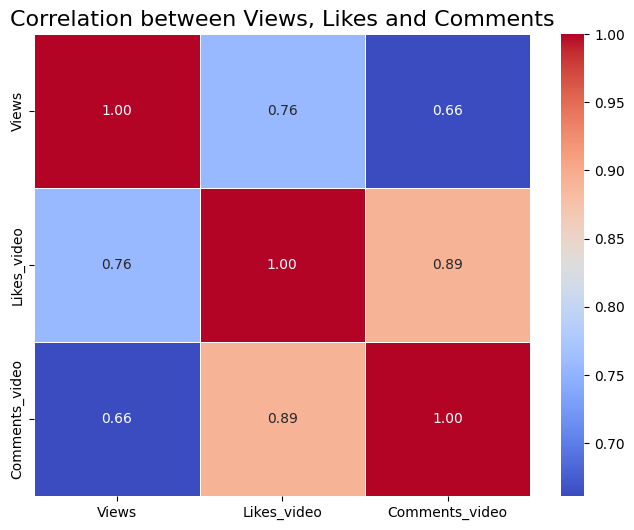

In [ ]:
correlation_data = df.drop_duplicates(subset='Video ID')[['Views', 'Likes_video', 'Comments_video']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation between Views, Likes and Comments', fontsize=16)
plt.show()

**Analyze engagement ratios**

Create the engagement ratio columns, multiply by 1000. Why? A lot of people just watch the video and don't want to like or comment. This ratio calculate how many people leave a comment or click like on youtube video per 1000 views. If the result is 20, which means for per 1000 views, the video receive the average of 20 likes from audience. This ratio indicates the audience engagement (some people just watch the video, don't interact. but when people like or comment on the video, maybe it's because this content is really useful for them). so this calculation based on our assumption and observation in normal life.

/tmp/ipython-input-1992430141.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_likes_ratio['likes_per_1k_views'], y=top_10_by_likes_ratio.index, palette='magma')


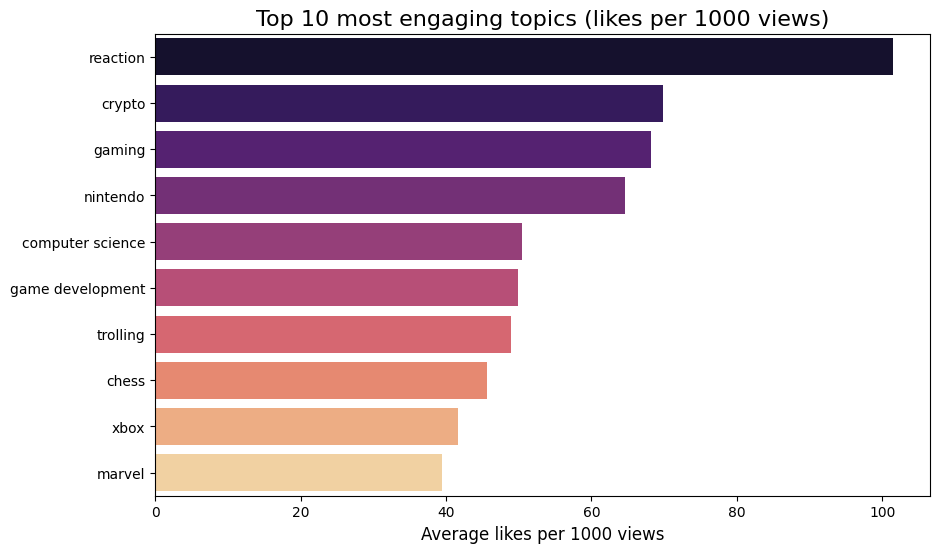

In [ ]:

df['likes_per_1k_views'] = (df['Likes_video'] / df['Views']) * 1000
df['comments_per_1k_views'] = (df['Comments_video'] / df['Views']) * 1000

# Now, let's group by 'Keyword' and calculate the average ratio for each topic.
avg_ratios_by_keyword = df.groupby('Keyword')[['likes_per_1k_views', 'comments_per_1k_views']].mean()

# Sort the topics by the highest likes ratio
top_10_by_likes_ratio = avg_ratios_by_keyword.sort_values(by='likes_per_1k_views', ascending=False).head(10)

#Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_by_likes_ratio['likes_per_1k_views'], y=top_10_by_likes_ratio.index, palette='magma')
plt.title('Top 10 most engaging topics (likes per 1000 views)', fontsize=16)
plt.xlabel('Average likes per 1000 views', fontsize=12)
plt.ylabel('')
plt.show()

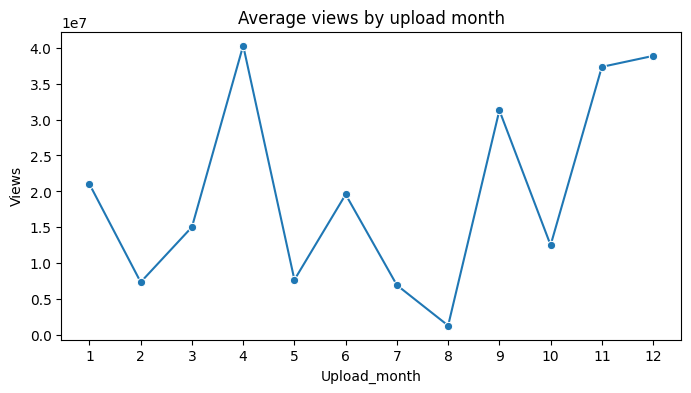

In [ ]:
df['Upload_month'] = df['Published At'].dt.month
month_views = df.groupby('Upload_month')['Views'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='Upload_month', y='Views', data=month_views, marker='o')
plt.title("Average views by upload month")
plt.xticks(range(1,13))
plt.show()

/tmp/ipython-input-611030192.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_views_by_day.index, y=avg_views_by_day.values, palette='crest')


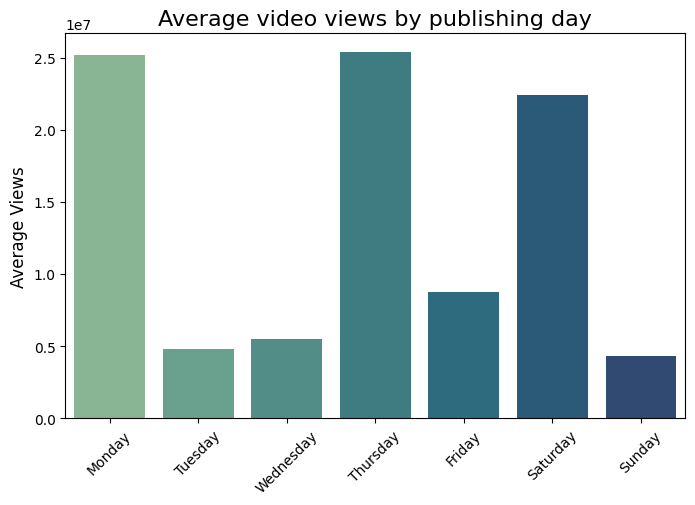

In [ ]:
df['Publish_Day'] = df['Published At'].dt.day_name()

# Calculate the average views for videos published on each day.
avg_views_by_day = df.groupby('Publish_Day')['Views'].mean().sort_values(ascending=False)

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_views_by_day = avg_views_by_day.reindex(day_order)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_views_by_day.index, y=avg_views_by_day.values, palette='crest')
plt.title('Average video views by publishing day', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Views', fontsize=12)
plt.xticks(rotation=45)
plt.show()